In [1]:
# =============================
# Task 1: Term Deposit Subscription Prediction
# =============================

# =============================
# Problem Statement & Objective
# =============================

# Problem Statement:
# A Portuguese banking institution ran a direct marketing campaign to 
# convince customers to subscribe to a term deposit. The dataset contains
# customer demographics, financial details, and campaign information.

# Objective:
# Build and evaluate predictive models (Logistic Regression and Random Forest)
# to classify whether a customer will subscribe ("yes") or not ("no") to a 
# term deposit. Also, use SHAP values to interpret feature importance.

# =============================
# Step 1: Import libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# =============================
# Step 2: Load dataset
# =============================
# Note: The dataset uses ';' as a separator in the CSV file
file_path = r"D:\Internship Tasks\bank.csv"  # <-- Update path if needed
df = pd.read_csv(file_path, sep=";")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


Dataset Shape: (4521, 17)

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Shape before encoding: (4521, 16)
Shape after encoding: (4521, 51)

Train shape: (3616, 51)
Test shape: (905, 51)

Target distribution in Train set:
y
0    0.884679
1    0.115321
Name: proportion, dtype: float64


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results
Accuracy: 0.8861878453038674

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.51      0.22      0.31       104

    accuracy                           0.89       905
   macro avg       0.71      0.60      0.62       905
weighted avg       0.86      0.89      0.87       905



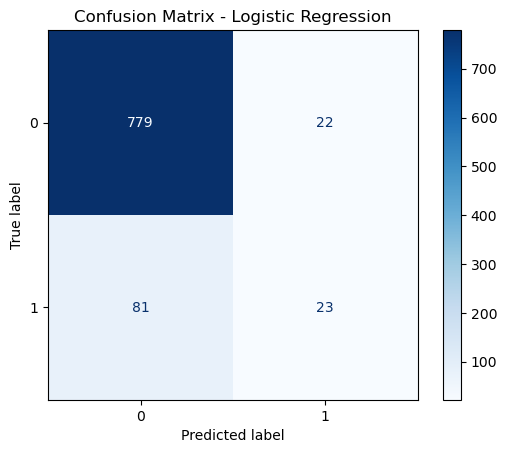

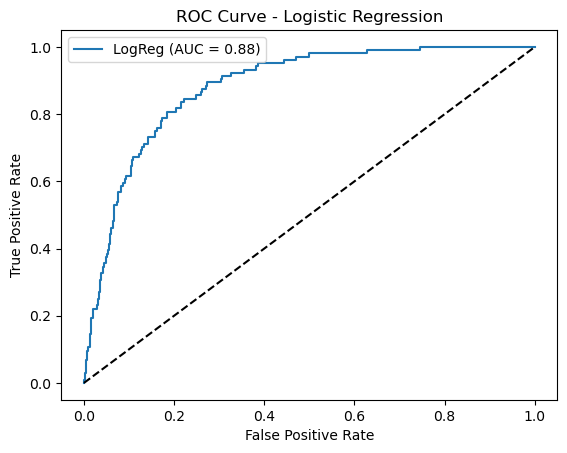


Random Forest Results
Accuracy: 0.8895027624309392

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.54      0.26      0.35       104

    accuracy                           0.89       905
   macro avg       0.72      0.62      0.65       905
weighted avg       0.87      0.89      0.87       905



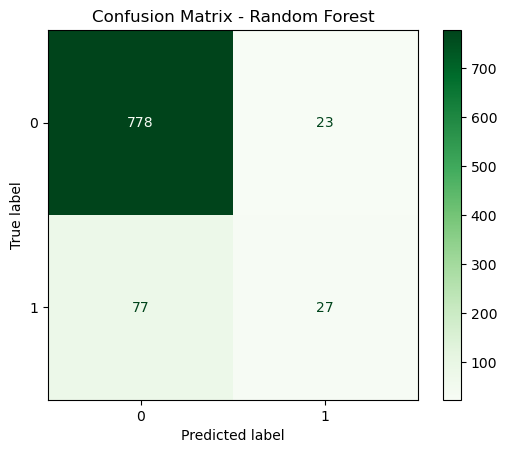

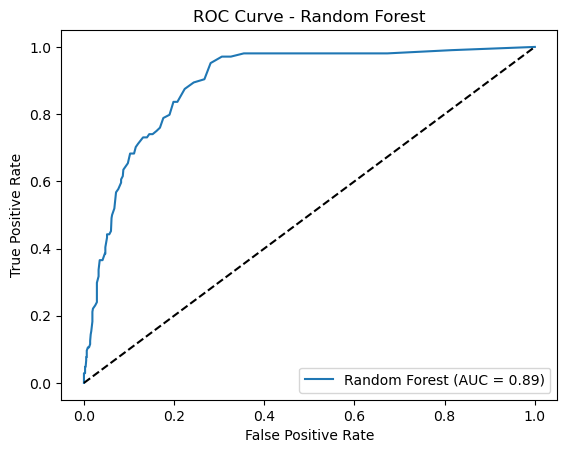


Final Model Comparison
Logistic Regression Accuracy: 0.8861878453038674
Random Forest Accuracy: 0.8895027624309392

Conclusion:
Both models perform well, with Random Forest showing slightly higher accuracy.
However, due to class imbalance, recall for the subscribed ('yes') class remains lower.


ModuleNotFoundError: No module named 'shap'

In [2]:

# =============================
# Step 3: Encode categorical features
# =============================
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", categorical_cols.tolist())

# Separate features (X) and target (y)
X = df.drop("y", axis=1)
y = df["y"].map({"yes": 1, "no": 0})  # Convert target to binary 1/0

# One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=False)

print("\nShape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

# =============================
# Step 4: Train-Test Split
# =============================
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nTarget distribution in Train set:")
print(y_train.value_counts(normalize=True))

# =============================
# Step 5: Logistic Regression
# =============================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n=============================")
print("Logistic Regression Results")
print("=============================")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve for Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# =============================
# Step 6: Random Forest Classifier
# =============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=============================")
print("Random Forest Results")
print("=============================")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# =============================
# Step 7: Final Comparison
# =============================
print("\n=============================")
print("Final Model Comparison")
print("=============================")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConclusion:")
print("Both models perform well, with Random Forest showing slightly higher accuracy.")
print("However, due to class imbalance, recall for the subscribed ('yes') class remains lower.")

# =============================
# Step 8: SHAP Feature Importance (Model Explainability)
# =============================
import shap

# Ensure data is numeric
X_train_numeric = X_train.astype(float)
X_test_numeric = X_test.astype(float)

# SHAP Explainer for Random Forest
explainer = shap.Explainer(rf, X_train_numeric, model_output="probability")

# Compute SHAP values for the test set
shap_values = explainer(X_test_numeric)

print("\nX_test_numeric shape:", X_test_numeric.shape)
print("SHAP values shape:", shap_values.values.shape)

# Global Feature Importance Plot
shap.summary_plot(
    shap_values.values,
    X_test_numeric,
    feature_names=X_test_numeric.columns,
    plot_type="bar"
)
